In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
sns.set_palette("colorblind")

In [3]:
data = pd.read_csv("C:\\Users\Walid\Documents\sleepstudy.csv")
data.index = data[data.columns[0]]
data = data[data.columns[1:4]]

In [4]:
data.head(5)

,Reaction,Days,Subject
Unnamed: 0,,,
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


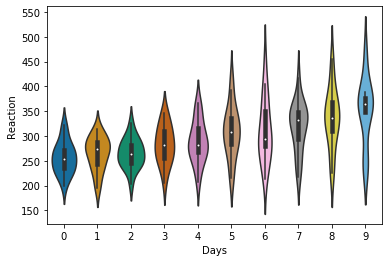

In [5]:
sns.violinplot(x="Days", y='Reaction', data=data)
plt.savefig("figure.pdf") 

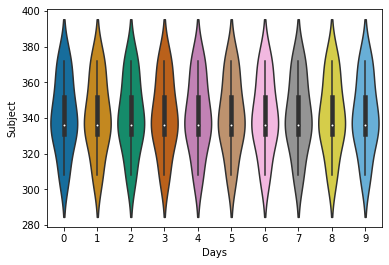

In [6]:
sns.violinplot(x="Days", y='Subject', data=data)
plt.savefig("figure2.pdf") 

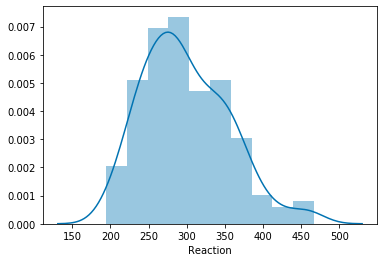

In [7]:
# plot the distribution of Reaction
sns.distplot(data.Reaction)
plt.savefig("figure3.pdf")
plt.show()

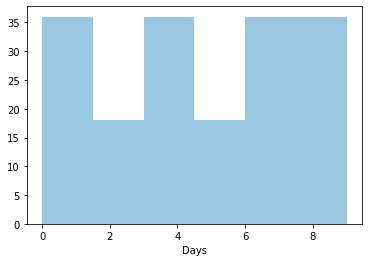

In [8]:
# plot the distribution of the days
sns.distplot(data.Days, kde=False)
plt.savefig("figure4.pdf") 
plt.show()

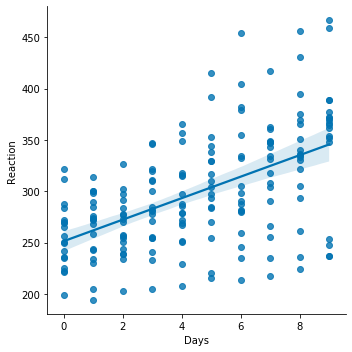

In [9]:
sns.lmplot(x = "Days", y = "Reaction", data = data)
plt.savefig("figure5.pdf")

In [10]:
# OLS
modelOLS = smf.ols("Reaction ~ Days", data, groups=data["Subject"])
resultOLS = modelOLS.fit()
print(resultOLS.summary())

                            OLS Regression Results                            
Dep. Variable:               Reaction   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     71.46
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           9.89e-15
Time:                        01:37:45   Log-Likelihood:                -950.15
No. Observations:                 180   AIC:                             1904.
Df Residuals:                     178   BIC:                             1911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    251.4051      6.610     38.033      0.0

In [11]:
# GLM
modelGLM = smf.glm("Reaction ~ Days", data, groups=data["Subject"])
resultGLM = modelGLM.fit()
print(resultGLM.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Reaction   No. Observations:                  180
Model:                            GLM   Df Residuals:                      178
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          2276.7
Method:                          IRLS   Log-Likelihood:                -950.15
Date:                Sun, 08 Nov 2020   Deviance:                   4.0525e+05
Time:                        01:37:46   Pearson chi2:                 4.05e+05
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    251.4051      6.610     38.033      0.0

In [13]:
# LMM
modelLMM = smf.mixedlm("Reaction ~ Days ", data, groups=data["Subject"])
resultLMM = modelLMM.fit()
print(resultLMM.summary())

         Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: Reaction 
No. Observations:  180     Method:             REML     
No. Groups:        18      Scale:              960.4568 
Min. group size:   10      Log-Likelihood:     -893.2325
Max. group size:   10      Converged:          Yes      
Mean group size:   10.0                                 
--------------------------------------------------------
           Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  251.405    9.747 25.794 0.000 232.302 270.508
Days        10.467    0.804 13.015 0.000   8.891  12.044
Group Var 1378.176   17.156                             



In [14]:
y = data.Reaction
y_predict_LMM = resultLMM.fittedvalues
RMSE_LMM = sqrt(((y-y_predict_LMM)**2).values.mean())
results = pd.DataFrame()
results["Method"] = ["LMM"]
results["RMSE"] = RMSE_LMM

y_predict_GLM = resultGLM.fittedvalues
RMSE_GLM = sqrt(((y-y_predict_GLM)**2).values.mean())
results.loc[1] = ["GLM",RMSE_GLM]

y_predict_OLS = resultOLS.fittedvalues
RMSE_OLS = sqrt(((y-y_predict_OLS)**2).values.mean())
results.loc[2] = ["OLS",RMSE_OLS]

results

,Method,RMSE
0,LMM,29.410624
1,GLM,47.448898
2,OLS,47.448898


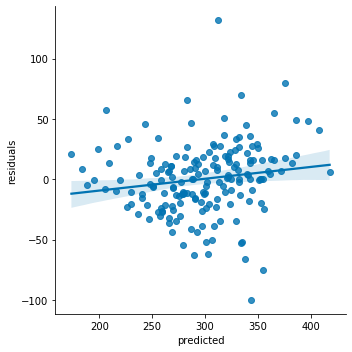

In [17]:
performance = pd.DataFrame()
performance["residuals"] = resultLMM.resid.values
performance["Days"] = data.Days
performance["predicted"] = resultLMM.fittedvalues
sns.lmplot(x = "predicted", y = "residuals", data = performance)
plt.savefig("figure6.pdf") 

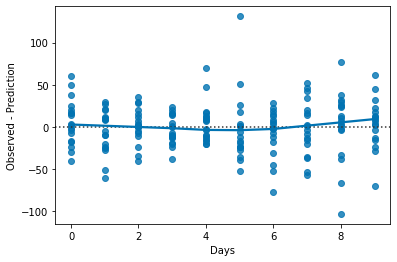

In [16]:
ax = sns.residplot(x = "Days", y = "residuals", data = performance, lowess=True)
ax.set(ylabel='Observed - Prediction')
plt.show()

In [18]:
likev = resultLMM.profile_re(0, 're', dist_low=0.1, dist_high=0.1)

Text(0, 0.5, '-2 times profile log likelihood')

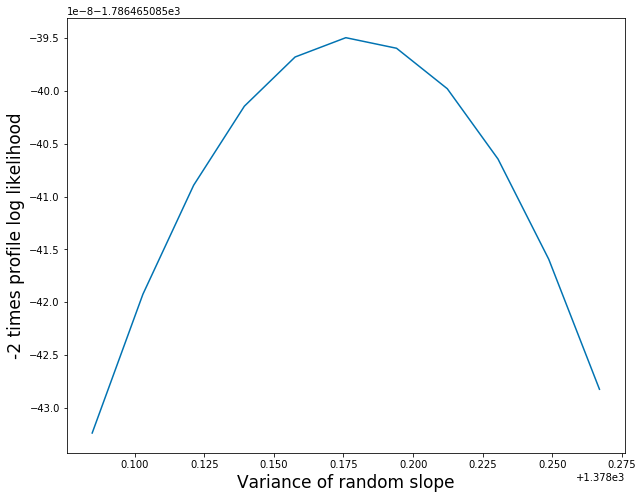

In [19]:
plt.figure(figsize=(10,8))
plt.plot(likev[:,0], 2*likev[:,1])
plt.xlabel("Variance of random slope", size=17)
plt.ylabel("-2 times profile log likelihood", size=17)